In [1]:
# Импорт базовых библиотек
import numpy as np
import pandas as pd

# Визуализация

import seaborn as sns
import matplotlib.pyplot as plt

# Utils
from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
df = pd.read_csv('nba2k-full.csv')
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


In [3]:
df = df.drop(['full_name', 'team', 'position', 'country', 'college', 'version', ], axis=1)
df.head()

,rating,jersey,b_day,height,weight,salary,draft_year,draft_round,draft_peak
0,97,#23,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,2003,1,1
1,97,#2,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,2011,1,15
2,96,#34,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,2013,1,15
3,96,#7,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,2007,1,2
4,96,#13,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,2009,1,3


In [4]:
df['jersey'] = df['jersey'].map(lambda x: x.lstrip('#'))
df['jersey'] = df['jersey'].astype(int)
df['salary'] = df['salary'].map(lambda x: x.lstrip('$'))
df['salary'] = df['salary'].astype(int)
df['draft_year'] = [2020-x for x in df['draft_year']]
df['height'] = df['height'].str.split('/').str.get(1)
df['height'] = df['height'].astype(float)
df['weight'] = df['weight'].str.split('/').str.get(1)
df['weight'] = [x[:-3] for x in df['weight']]
df['weight'] = df['weight'].astype(float)
df['b_day'] = pd.to_datetime(df['b_day'])
df['b_day'] = df['b_day'].dt.year
df['b_day'] = [2020-x for x in df['b_day']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rating       439 non-null    int64  
 1   jersey       439 non-null    int32  
 2   b_day        439 non-null    int64  
 3   height       439 non-null    float64
 4   weight       439 non-null    float64
 5   salary       439 non-null    int32  
 6   draft_year   439 non-null    int64  
 7   draft_round  439 non-null    object 
 8   draft_peak   439 non-null    object 
dtypes: float64(2), int32(2), int64(3), object(2)
memory usage: 27.6+ KB


In [5]:
from scipy import stats
print('b_day: ', stats.normaltest(df['b_day']))
print('rating: ', stats.normaltest(df['rating']))
print('jersey: ', stats.normaltest(df['jersey']))
print('height: ', stats.normaltest(df['height']))
print('weight: ', stats.normaltest(df['weight']))
print('salary: ', stats.normaltest(df['salary']))
print('draft_year: ', stats.normaltest(df['draft_year']))

b_day:  NormaltestResult(statistic=19.046651723136662, pvalue=7.312605233803387e-05)
rating:  NormaltestResult(statistic=94.02751010751368, pvalue=3.82107539157023e-21)
jersey:  NormaltestResult(statistic=196.92445596700114, pvalue=1.7314011867778939e-43)
height:  NormaltestResult(statistic=5.62618509546723, pvalue=0.060019093178853275)
weight:  NormaltestResult(statistic=10.237619117305298, pvalue=0.005983141235895887)
salary:  NormaltestResult(statistic=118.93128312651041, pvalue=1.494169978880649e-26)
draft_year:  NormaltestResult(statistic=36.08344165873096, pvalue=1.4607644792221953e-08)


In [6]:
print('b_day: ', stats.kstest(df['b_day'], "lognorm", stats.lognorm.fit(df['b_day'])))
print('rating: ', stats.kstest(df['rating'], "lognorm", stats.lognorm.fit(df['rating'])))
print('jersey: ', stats.kstest(df['jersey'], "lognorm", stats.lognorm.fit(df['jersey'])))
print('height: ', stats.kstest(df['height'], "lognorm", stats.lognorm.fit(df['height'])))
print('weight: ', stats.kstest(df['weight'], "lognorm", stats.lognorm.fit(df['weight'])))
print('salary: ', stats.kstest(df['salary'], "lognorm", stats.lognorm.fit(df['salary'])))
print('draft_year: ', stats.kstest(df['draft_year'], "lognorm", stats.lognorm.fit(df['draft_year'])))

b_day:  KstestResult(statistic=0.07041563050908042, pvalue=0.024480024990342186)
rating:  KstestResult(statistic=0.06016404452323826, pvalue=0.07996904110491976)
jersey:  KstestResult(statistic=0.3685681487989494, pvalue=5.382589466069343e-54)
height:  KstestResult(statistic=0.07360229321395378, pvalue=0.01631440373013699)
weight:  KstestResult(statistic=0.04369516864743539, pvalue=0.3612576699741178)
salary:  KstestResult(statistic=0.7812306425692018, pvalue=2.739436262047476e-284)
draft_year:  KstestResult(statistic=0.10083099812538493, pvalue=0.00024444134937172483)


In [7]:
print('rating: ', stats.normaltest(np.log(df['rating'])))
print('weight: ', stats.normaltest(np.log(df['weight'])))

rating:  NormaltestResult(statistic=69.81310759095422, pvalue=6.922712637299939e-16)
weight:  NormaltestResult(statistic=7.6181632373789245, pvalue=0.022168528773669243)


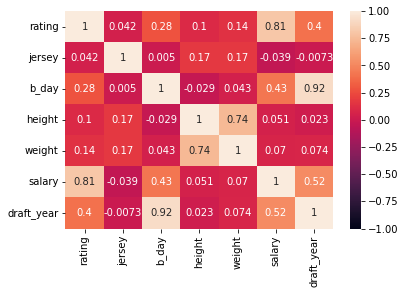

In [8]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True);